In [156]:
import pandas as pd
import re

In [157]:
df = pd.read_csv(r"C:\Study_courses\2022_winter_LMU\Applied_DL_Bert\Data\protein_data.csv", index_col=0)

In [158]:
df.isnull().sum()

code0                       0
code1                       0
code2                       0
domain_alpha1_2_sequence    0
dtype: int64

In [159]:
# # extract protein info
# protein_type = df["allele_full_name"].apply(lambda x: re.split('\W+', x)[1:4])
# df[['code0', 'code1', 'code2']] = pd.DataFrame(list(protein_type), columns=['code0', 'code1', 'code2'])
# df = df[['code0', 'code1', 'code2', 'domain_alpha1_2_sequence']]

# # transform protein types to int number
# df["code0"].replace({"A":0, "B":1, "C":2}, inplace=True)
# df[['code1', 'code2']] = df[['code1', 'code2']].astype(int)

# # transform protein types to consecutive int number, for one-hot encoding in the next step
# def reindex_column(df, colname):
#     my_map = pd.DataFrame(df[colname].unique()).to_dict()[0]
#     inv_map = {v: k for k, v in my_map.items()}
#     df[colname].replace(inv_map, inplace=True)
    
# reindex_column(df, "code1")
# reindex_column(df, "code1")

In [160]:
def combine_minority(df, colname, threshold):
    target = len(df[colname].unique())
    comb_idx = df[colname].value_counts().sort_values() < threshold
    comb_idx = list(comb_idx[comb_idx].index)
    comb_dict = {i:target for i in comb_idx} 
    df[colname].replace(comb_dict, inplace=True)

combine_minority(df, "code1", 50)
combine_minority(df, "code2", 5)

<Axes: xlabel='protein_type', ylabel='number'>

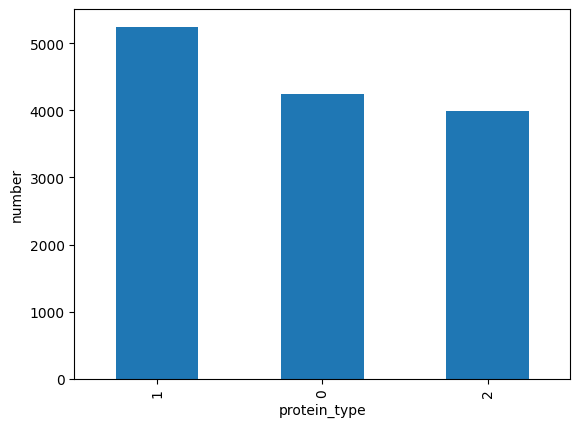

In [137]:
df["code0"].value_counts().plot(kind='bar',xlabel="protein_type", ylabel="number")

In [155]:
(df["code2"].value_counts().sort_values() >5).sum()

539

In [153]:
df.shape

(13478, 4)

In [42]:
df_A = df[df["code1"] == "A"]
code2_A = list(df_A["code2"].value_counts().sort_values().index)

df_B = df[df["code1"] == "B"]
# df_B["code2"].value_counts().sort_values()
code2_B = list(df_B["code2"].value_counts().sort_values().index)

df_C = df[df["code1"] == "C"]
code2_C = list(df_C["code2"].value_counts().sort_values().index)

print(set(code2_A) & set(code2_B))
print(set(code2_C) & set(code2_B))
print(set(code2_A) & set(code2_C))
# code2_A

set()
{'08', '07', '15', '14', '18'}
{'02', '03', '01'}


In [131]:
df["code1"].max()

62

In [124]:
code1_combine

56     True
15     True
52     True
55     True
20     True
      ...  
0     False
25    False
2     False
1     False
21    False
Name: code1, Length: 63, dtype: bool

In [129]:
(df["code1"].value_counts().sort_values() < 50).index

Int64Index([56, 15, 52, 55, 20, 51, 18, 54, 53, 50, 38, 14, 13, 36, 34, 19, 16,
            45, 39, 62, 41, 44, 40, 33,  6, 47, 37, 29, 43, 30,  4, 46, 49, 11,
            48, 23,  8, 31,  9, 61, 10,  7, 12, 26, 24, 27, 58, 17, 59, 60, 42,
             3, 35, 57, 32, 22,  5, 28,  0, 25,  2,  1, 21],
           dtype='int64')

In [29]:
(df["code3"].value_counts().sort_values() < 5).sum()

467

In [30]:
len(df["code3"].unique())

1026

In [7]:
len(df["code2"].unique())

63

1026

In [9]:
df["code2"].apply(int).unique()

array([ 1,  2,  3, 11, 23, 24, 25, 26, 29, 30, 31, 32, 33, 34, 36, 43, 66,
       68, 69, 74, 80,  7,  8, 13, 14, 15, 18, 27, 35, 37, 38, 39, 40, 41,
       42, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59,
       67, 73, 78, 81, 82, 83,  4,  5,  6, 12, 16, 17], dtype=int64)

In [10]:
df[['code1', 'code2', 'code3']].iloc[1,:].to_list()

['A', '01', '02']